# Nonlinear Solvers
## CH EN 2450 - Numerical Methods
**Prof. Tony Saad (<a>www.tsaad.net</a>) <br/>Department of Chemical Engineering <br/>University of Utah**
<hr/>

In [18]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_theme()
sns.set_style('whitegrid')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
mpl.rcParams['lines.markeredgecolor'] = 'w'
mpl.rcParams['lines.markeredgewidth'] = .5
import numpy as np
from scipy.optimize import fsolve

# Parachutist in Free Fall

A parachutist in free fall subject to linear drag has the following velocity as a function of time, mass, and drag coefficient
\begin{equation}
u(t)=\frac{mg}{c}\left(1-e^{-\frac{c}{m}t}\right)
\end{equation}
where $m$ is the mass of the parachutist, $g = 9.81$ is the gravitational constant, $c$ is the drag coefficient, $t$ is the time, and $u$ is the velocity of the parachutist.

Our goal in this problem is the find the drag coefficient required for a parachutist of mass $m_0$ to reach a velocity of $u_0$ in an amount of time $t_0$.

The first order of business is to define the residual function $r$
\begin{equation}
r(x) \equiv \frac{mg}{c}\left(1-e^{-\frac{c}{m}t}\right) - u(t)
\end{equation}
For a given mass $m_0$, time $t_0$, and velocity $u_0$, solving $r(c) = 0$ will return the value of the drag coefficient $c$ (or the root) such that a parachutist of mass $m_0$ reaches a velocity of $v_0$ in time $t_0$.

We first define this residual function as

In [3]:
# define residual function for parachutist. Note the use of m0, u0, and t0 - those will be defined later.
# The only unknown here is c which stands for the drag coefficient
def r(c):
    g = 9.81
    result = m0*g/c * (1.0 - np.exp(- c/m0*t0)) - u0
    return result

Now plot this residual function versus the drag coefficient for $m0=70$kg, $t_0 = 10$s, and $u_0 = 40$ m/s

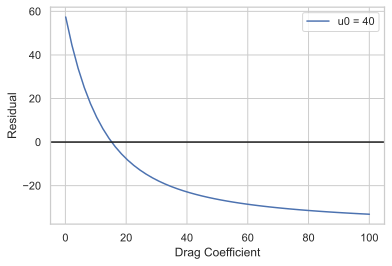

In [19]:
x = np.linspace(0.1,100)
m0 = 70
t0 = 10
u0 = 40
plt.plot(x, r(x), label='u0 = 40')
plt.axhline(y=0,color='k')
plt.xlabel('Drag Coefficient')
plt.ylabel('Residual')
plt.legend()
plt.draw()
plt.show()

We can see that there's a root somewhere between 10 and 20

# Activity 1 - Bisection Method

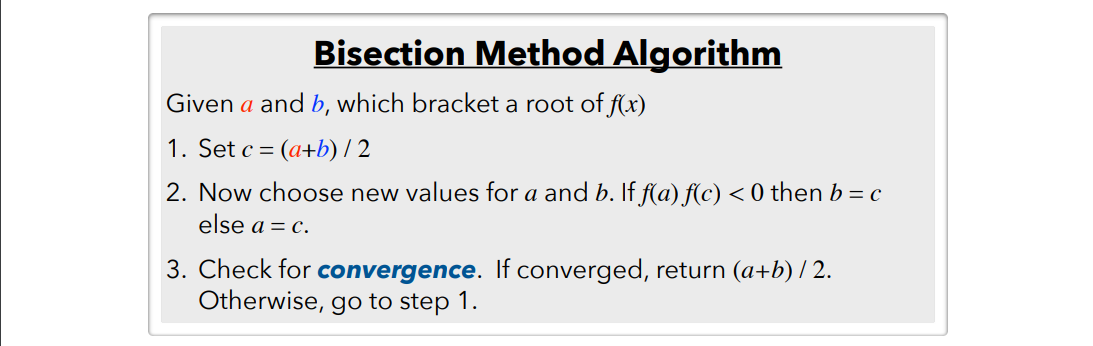

Here we define the bisection routine (see slides)

In [46]:
def bisect(f, a, b, tol, maxiter):
    err = tol + 100
    niter = 0
    while err > tol and niter < maxiter:
        niter +=1
        c = (a + b)/2.0
        if (f(a) * f(c) < 0.0):
            b = c
        else:
            a = c
        err = abs(f(c))
    return [c, err, niter]

Now find the drag coefficient required for our parachutist

In [47]:
# m0 and t0 have already been defined
u0 = 40
bisect(r, 10, 20, 1e-20, 100)

[15.21408981129792, 0.0, 51]

Now find the drag coefficient that would result in velocity of 10 m/s. Do you expect the drag coefficient to be larger or smaller?
For the same parachutist and length of time, a lower velocity means that there should be a lot more drag on the parachutist. We therefore expect a larger drag coefficient.

In [48]:
u0 = 10
bisect(r, 10, 20, 1e-20, 100)

[20.0, 22.36305101744636, 100]

We got nothing! why?
Let's plot the residual for these conditions and see

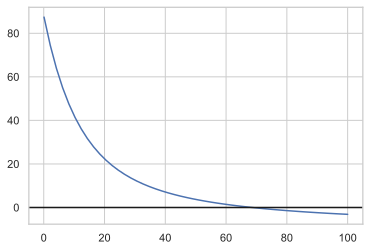

In [49]:
u0 = 10
plt.plot(x, r(x), label='u0 = 10')
plt.axhline(y=0,color='k')

It looks like we screwed up the brackets, a and b! The drag coefficient is somewhere between 60 and 80

In [50]:
u0 = 10
bisect(r, 60, 80, 1e-20, 100)

[68.66622799549386, 0.0, 51]

This results in a drag coefficient of 68.7 - about 4.5 times larger than the case with a velocity of 30 m/s - as expected. 

Now let's use the built-in function fsolve:

In [83]:
u0 = 40
fsolve(r, 10)[0]

15.214089811297901

# Activity 2 - Method of False Position (Regula-Falsi)

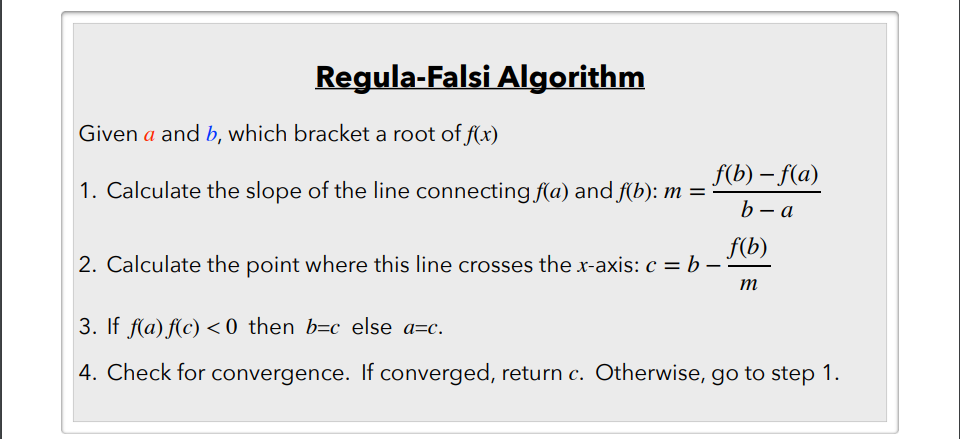

In [84]:
def falsi(f,a,b,tol,maxiter):
    niter = 0
    err = tol + 100
    while err > tol and niter < maxiter:
        m = (f(b) - f(a))/(b - a)
        c = b - f(b)/m
        err = abs(f(c))
        if f(c) * f(a) < 0.0:
            b = c
        else:
            a = c
        niter += 1
    return c, err, niter          

In [85]:
falsi(r, 10, 20, 1e-20, 100)

(15.21408981129792, 0.0, 22)

# Activity 3 - Secant method

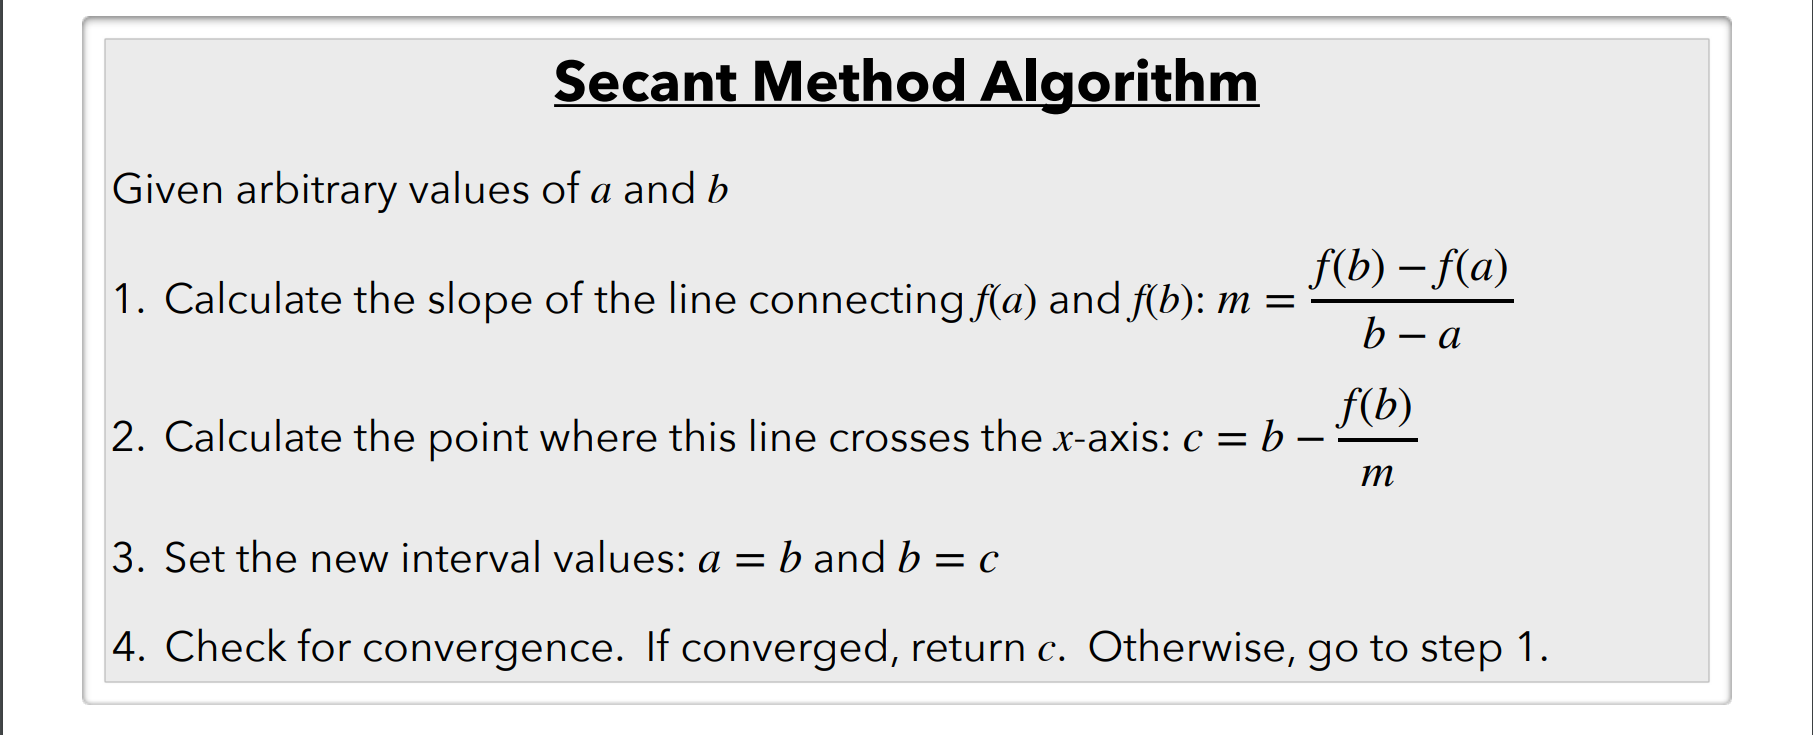

In [88]:
def secant(f,a,b,tol,maxiter):
    niter = 0
    err = tol + 100
    while err > tol and niter < maxiter:
        m = (f(b) - f(a))/(b - a)
        c = b - f(b)/m
        err = abs(f(c))
        a = b
        b = c
        niter += 1
    return c, err, niter

In [89]:
secant(r, 10, 20, 1e-20, 100)

(15.214089811297923, 0.0, 7)

# Activity 4 - Newton's Method with Analytical Derivative

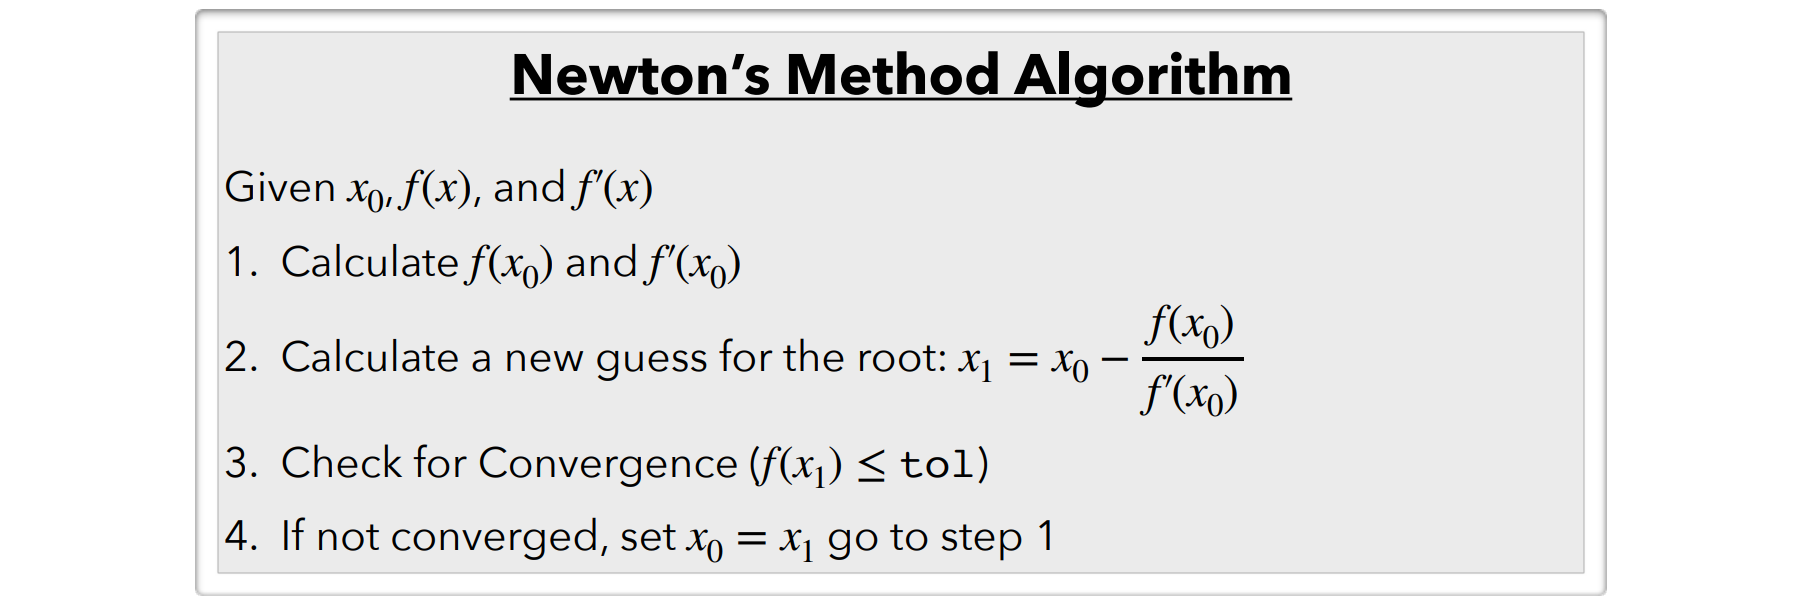

In [91]:
def newton(f,df,x0,tol):
    niter = 0
    err = tol + 100
    while err > tol and niter < 100:
        x1 = x0 - f(x0)/df(x0)
        x0 = x1
        err = abs(f(x0))
        niter += 1
    return x1, err, niter           

we need to define the analytical derivative of the residual function in this case, in other words, we need
\begin{equation}
\frac{\partial r}{\partial c} = -\frac{m g}{c^2} + \frac{(m+ct) g}{c^2} e^{-\frac{c}{m} t}
\end{equation}

In [92]:
def df(c):
    g = 9.81
    result = -m0*g/c/c + (m0+c*t0)/c/c*np.exp(-c/m0*t0)
    return result

In [98]:
u0 = 40
newton(r, df, 20, 1e-20)

(15.214089811297923, 0.0, 31)

# Activity 5 - Newton's Method with Numerical Derivative

In [96]:
def newton2(f, x0, tol):
    niter = 0
    err = 1e5
    while err > tol and niter < 20:
        h = 1e-5*x0 + 1e-12
        df = (f(x0+h) - f(x0))/h
        x1 = x0 - f(x0)/df
        x0 = x1
        err = abs(f(x1))
        niter +=1
    return x1, err, niter

In [99]:
newton2(r, 20, 1e-20)

(15.214089811297919, 0.0, 5)